In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
import torch
from torch import nn

DATA_DIR = "../../data/dss/"
CHAR_DATA_DIR = DATA_DIR + "monkbrill/"
IMG_DATA_DIR = DATA_DIR + "train-imgs/"

(2706,)
[ 511  512  579 ... 2269 2270 2271]
[ 493  494  495 ... 3070 3071 3074]
[0 0 0 ... 0 0 0]
(2016,)
<class 'numpy.uint32'>
<class 'numpy.uint32'>


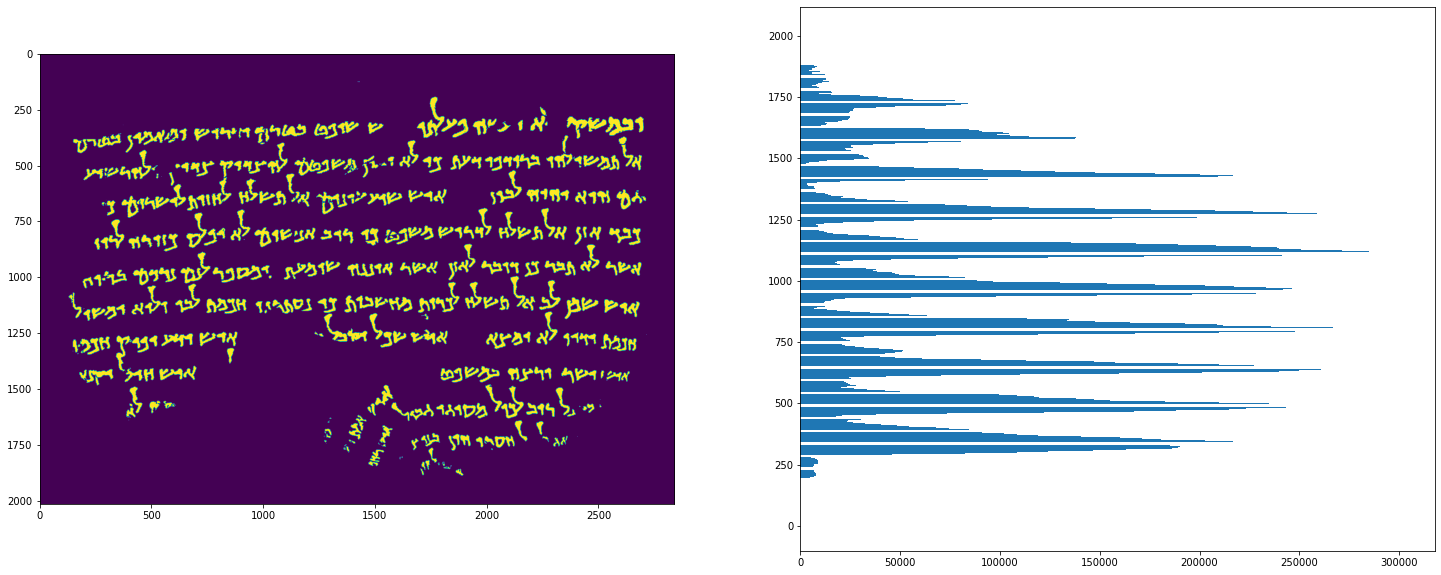

In [4]:
img_path = IMG_DATA_DIR + "P123-Fg002-R-C01-R01-binarized.jpg"

img = None

img = cv.threshold(cv.imread(img_path, 0), 127, 255, cv.THRESH_BINARY_INV)[1]
pad = 128
thresh = 256
row_hist = np.sum(img, axis=1)
inked_rows = np.array(range(img.shape[0]))[row_hist > thresh]
inked_cols = np.array(range(img.shape[1]))[np.sum(img, axis=0) > thresh]
row_range = inked_rows[0] - pad, inked_rows[-1] + pad
col_range = inked_cols[0] - pad, inked_cols[-1] + pad
print(np.shape(row_hist))
row_hist = row_hist[row_range[0]:row_range[1]]
img = img[row_range[0]:row_range[1], col_range[0]:col_range[1]]
empty_rows = np.array(range(len(row_hist)))[row_hist < 0]
print(inked_rows)
print(inked_cols)
print(row_hist)
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
ax[0].imshow(img)
# bar_x = list(range(inked_rows[-1] - inked_rows[0]))
# print(np.shape(bar_x))
print(np.shape(row_hist))
print(type(row_hist[0]))
print(type(np.array(range(len(row_hist)), dtype=np.uint32)[0]))
ax[1].barh(np.array(range(len(row_hist)), dtype=np.uint32), row_hist)
# plt.imshow(img)
plt.show()

In [5]:
def find_valleys(row_hist, window_size=50, height_diff=20000):
  valleys = []
  valley_height = np.inf
  valley_idx = 0
  peak_height = 0
  in_valley = True
  
  for row in range(len(row_hist) - window_size):
    height = np.mean(row_hist[row : row + window_size])
    # print(row_hist[row])
    if in_valley and height > valley_height + height_diff:
      print(1)
      in_valley = False
      valley_height = np.inf
      valleys.append(valley_idx + int(window_size / 2))
    
    elif not in_valley and height < peak_height - height_diff:
      print(2)
      in_valley = True
      peak_height = 0
    
    if in_valley and height < valley_height:
      print(3)
      valley_height = height
      valley_idx = row
    
    elif not in_valley and height > peak_height:
      print(4)
      peak_height = height

  return valleys

valleys = find_valleys(row_hist)
print(valleys)
# print(row_hist[0])
    
  

3
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


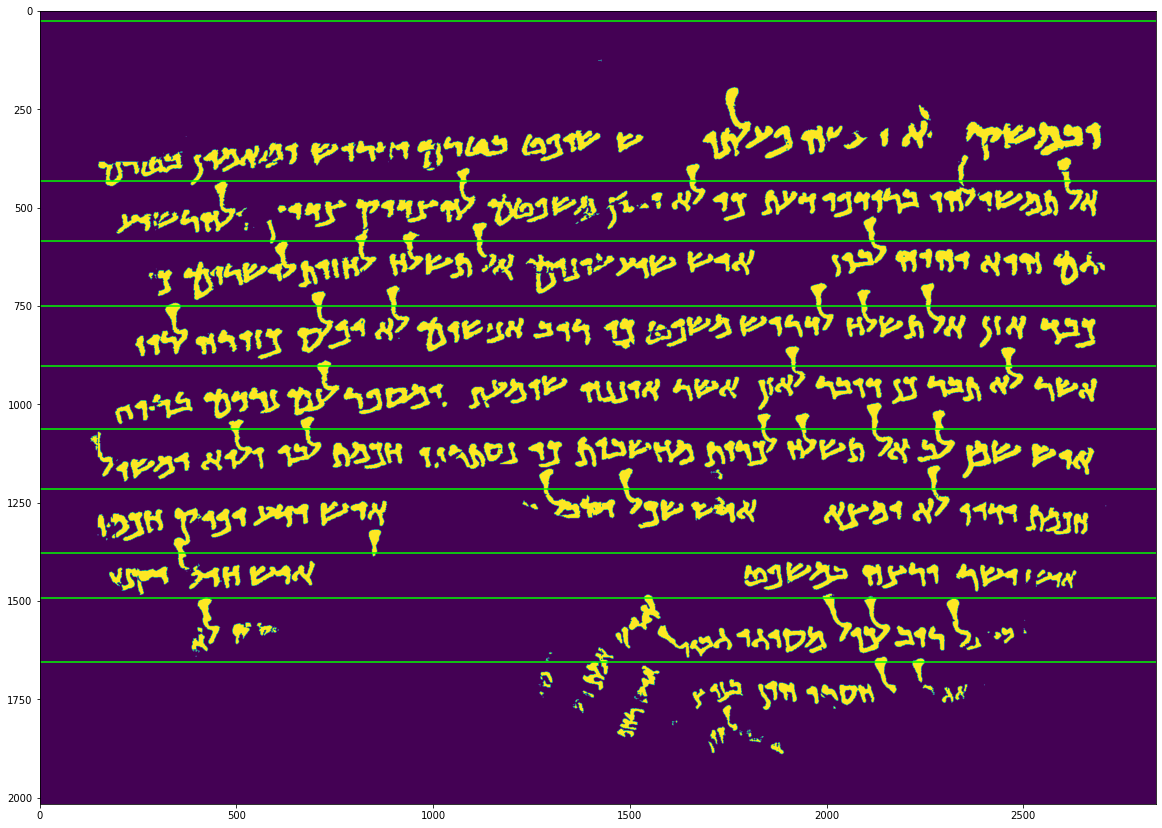

In [6]:
fig = plt.figure(figsize=(20, 30))
# plt.barh(np.array(range(len(row_hist)), dtype=np.uint32), row_hist)
plt.imshow(img)
for v in valleys:
  plt.axhline(v, color='lime')

plt.show()

In [7]:
print(np.shape(img[valleys[1]:valleys[2]]))
print(np.multiply(*np.shape(img[valleys[1]:valleys[2]]))/64**2)
print((np.multiply(*np.shape(img[valleys[1]:valleys[2]]))/105*64)/64**2)

(152, 2837)
105.279296875
64.17023809523809


In [17]:
gen = nn.Sequential(
  # in: latent_size x 1 x 1

  nn.ConvTranspose2d(64**2, 512, kernel_size=4, stride=1, padding=0, bias=False),
  nn.BatchNorm2d(512),
  nn.ReLU(True),
  # out: 512 x 4 x 4

  nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
  nn.BatchNorm2d(256),
  nn.ReLU(True),
  # out: 256 x 8 x 8

  nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
  nn.BatchNorm2d(128),
  nn.ReLU(True),
  # out: 128 x 16 x 16

  nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
  nn.BatchNorm2d(64),
  nn.ReLU(True),
  # out: 64 x 32 x 32

  nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1, bias=False),
  nn.Tanh()
  # out: 1 x 64 x 64
)

gen.load_state_dict(torch.load('./trained/char/generator'))
print(gen)
print(list(gen.named_parameters()))

Sequential(
  (0): ConvTranspose2d(4096, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU(inplace=True)
  (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU(inplace=True)
  (12): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (13): Tanh()
)
[('0.weight', Parameter containing:
tensor([[[[-5.77

In [18]:
temp = nn.Sequential(
  nn.ConvTranspose2d(4, 64**2, kernel_size=4, stride=1, padding=0, bias=False),
  nn.BatchNorm2d(64**2),
  nn.ReLU(True),
)

temp.append(gen)
print(temp)

AttributeError: 'Sequential' object has no attribute 'append'